In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
alldata=pd.read_csv('includecrossdist_allparam_middlepair.txt',delimiter='\t',names=['t','c1c1','c2c2','c1c2','c2c1','acosa1','acosa2','acosi1','acosi2','x','y','z','d','sd','acroll','acpitch','acyaw','acringang'])
alldata.head(10)

,t,c1c1,c2c2,c1c2,c2c1,acosa1,acosa2,acosi1,acosi2,x,y,z,d,sd,acroll,acpitch,acyaw,acringang
0,0.030207,0.371835,0.478303,0.408115,0.417668,0.404047,0.382568,0.853239,0.540140,0.315816,0.265199,0.092088,0.422553,0.587763,0.929411,0.987546,0.410902,0.917848
1,0.016725,0.476841,0.613318,0.531906,0.592959,0.343564,0.366966,0.707874,0.124368,0.306837,0.353256,-0.303205,0.557559,0.658232,0.995737,0.950273,0.366427,0.946237
2,0.001747,0.625174,0.668335,0.663929,0.666180,0.178385,0.072504,0.284772,0.569730,-0.435687,0.030655,0.410835,0.599623,0.464587,0.360882,0.745381,0.069817,0.268912
3,0.012650,0.465637,0.577282,0.513328,0.491654,0.980221,0.122406,0.722023,0.634057,-0.341357,0.381082,0.033992,0.512741,0.600254,0.962652,0.945280,0.657784,0.909952
4,0.001109,0.578552,0.660545,0.652282,0.580356,0.762210,0.414371,0.502441,0.472155,-0.055687,0.052812,0.546471,0.551834,0.370502,0.869028,0.687277,0.270780,0.597293
5,0.017942,0.520825,0.566766,0.563011,0.572316,0.745761,0.207339,0.068650,0.501058,-0.146347,0.361314,-0.311960,0.499284,0.415531,0.800175,0.876501,0.512002,0.701401
6,0.002764,0.595826,0.716593,0.639616,0.661317,0.308642,0.683910,0.296077,0.344641,0.323734,0.147381,0.474369,0.592917,0.459615,0.678015,0.632370,0.851555,0.428767
7,0.002805,0.475057,0.609164,0.538684,0.483178,0.916673,0.790753,0.547673,0.167686,-0.176163,-0.491576,0.007632,0.522244,0.655175,0.954786,0.848189,0.990473,0.809814
8,0.004368,0.542276,0.660312,0.559183,0.601223,0.197583,0.317935,0.588526,0.628706,0.016692,0.057806,0.548575,0.551864,0.515407,0.848841,0.518124,0.329632,0.439799
9,0.000429,0.577266,0.667124,0.593877,0.588677,0.167507,0.217116,0.390888,0.081854,-0.299375,-0.333098,0.355883,0.572042,0.520830,0.996782,0.425185,0.995175,0.423923


In [2]:
alldata=alldata[alldata['t']<=0.17]

In [3]:
inputdat=np.array(alldata[["c1c1","c2c2","c1c2","c2c1","acosa1","acosa2","acosi1","acosi2","x","y","z","d","sd","acroll","acpitch","acyaw","acringang"]])
outputdat=np.array(alldata[["t"]]).ravel()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputdat,outputdat,train_size=0.8,random_state=42)

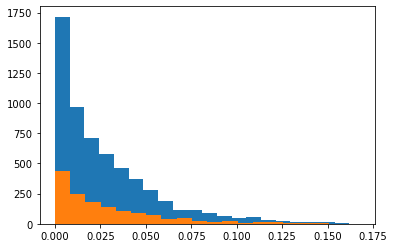

In [5]:
import matplotlib.pyplot as plt
plt.hist(Y_train,bins=20)
plt.hist(Y_test,bins=20)
plt.show()

In [6]:
print(Y_train.mean())
print(Y_test.mean())
print(Y_train.std())
print(Y_test.std())
print(Y_train.mean()/Y_test.mean())
print(Y_train.std()/Y_test.std())

0.027579724587816046
0.02880279952606126
0.027828623136180973
0.029851783999157094
0.9575362479213676
0.9322264671674816


In [7]:
# Normalizing the data
xmean=X_train.mean(0)
xstd=X_train.std(0)
ymean=Y_train.mean()
ystd=Y_train.std()

In [8]:
print(xmean,ymean,xstd,ystd)

[ 0.48203324  0.61467661  0.5466596   0.54702998  0.59478545  0.55071945
  0.46675648  0.41057289 -0.00537117 -0.00285266  0.01533853  0.52543822
  0.54086935  0.88466255  0.86929989  0.69563983  0.78175094] 0.027579724587816046 [0.05515656 0.0832722  0.0609049  0.0610283  0.28397988 0.28814489
 0.27463888 0.24861583 0.32972114 0.29018228 0.29238548 0.05097058
 0.10029361 0.20338104 0.1803374  0.29822936 0.25111383] 0.027828623136180973


In [9]:
norm_xtrain=(X_train-xmean)/xstd
norm_ytrain=(Y_train-ymean)/ystd
norm_xtest=(X_test-xmean)/xstd
norm_ytest=(Y_test-ymean)/ystd

In [10]:
# the SVM model works best when the values that are normalized

0.24100916445937182
0.9495210895817194


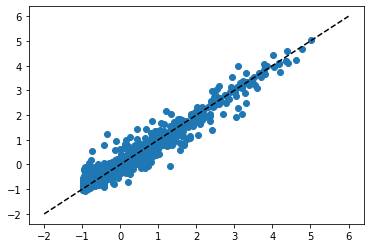

In [12]:
#Regression with only six parameter
norm_xtrain6=norm_xtrain[:,[0,1,2,3,11,15]]
norm_xtest6=norm_xtest[:,[0,1,2,3,11,15]]
clf6=SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1) #gamma auto was 1/6 and C was 1
clf6=clf6.fit(norm_xtrain6, norm_ytrain)
#testing on the trained model
Y_pred6=clf6.predict(norm_xtest6)
rmse6=np.sqrt(mean_squared_error(norm_ytest,Y_pred6))
rsq6=r2_score(norm_ytest,Y_pred6)
print(rmse6)
print(rsq6)
plt.scatter(norm_ytest, Y_pred6)
plt.plot([-2, 6], [-2, 6], '--k')

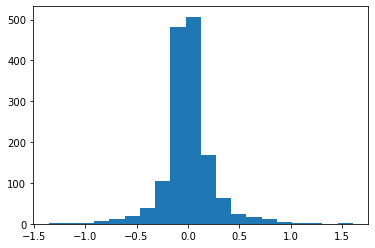

In [13]:
plt.hist(Y_pred6-norm_ytest,bins=20)
plt.show()

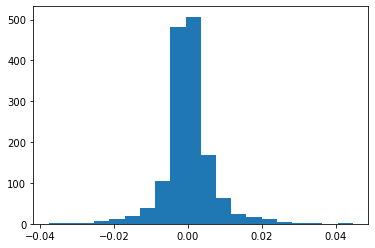

In [14]:
plt.hist(Y_pred6*ystd-norm_ytest*ystd,bins=20)
plt.show()

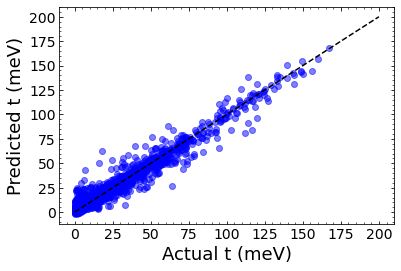

In [15]:
#Actual v/s predicted comparison
plt.scatter((norm_ytest*ystd+ymean)*1000, (Y_pred6*ystd+ymean)*1000,c="blue",alpha=0.5)
plt.xlabel('Actual t (meV)',fontsize=18)
plt.ylabel('Predicted t (meV)',fontsize=18)
plt.tick_params(direction='in',which='both',right='true',top='true')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot([0, 0.2*1000], [0, 0.2*1000], '--k')
plt.minorticks_on()

In [16]:
#Mean Absolute Error calculation on the test data for the trained model
from sklearn.metrics import mean_absolute_error
mean_absolute_error((norm_ytest*ystd+ymean)*1000,(Y_pred6*ystd+ymean)*1000)

4.321794995776042

In [18]:
#importing data for prediction of electronic coupling from structures of different simulation temperatures
nd600=np.array(pd.read_csv('p6_crossdist_allparam_anneal_600.txt',delimiter='\t',names=['c1c1','c2c2','c1c2','c2c1','d','acyaw']))
nd550=np.array(pd.read_csv('p6_crossdist_allparam_anneal_550.txt',delimiter='\t',names=['c1c1','c2c2','c1c2','c2c1','d','acyaw']))
nd500=np.array(pd.read_csv('p6_crossdist_allparam_anneal_500.txt',delimiter='\t',names=['c1c1','c2c2','c1c2','c2c1','d','acyaw']))
nd450=np.array(pd.read_csv('p6_crossdist_allparam_anneal_450.txt',delimiter='\t',names=['c1c1','c2c2','c1c2','c2c1','d','acyaw']))
nd400=np.array(pd.read_csv('p6_crossdist_allparam_anneal_400.txt',delimiter='\t',names=['c1c1','c2c2','c1c2','c2c1','d','acyaw']))
nd350=np.array(pd.read_csv('p6_crossdist_allparam_anneal_350.txt',delimiter='\t',names=['c1c1','c2c2','c1c2','c2c1','d','acyaw']))
nd300=np.array(pd.read_csv('p6_crossdist_allparam_anneal_300.txt',delimiter='\t',names=['c1c1','c2c2','c1c2','c2c1','d','acyaw']))

In [19]:
#converting the imported data into normalized input parameters required by the model
xmean6=np.array(list(xmean[i] for i in [0,1,2,3,11,15]))
xstd6=np.array(list(xstd[i] for i in [0,1,2,3,11,15]))

d600=(nd600-xmean6)/xstd6
d550=(nd550-xmean6)/xstd6
d500=(nd500-xmean6)/xstd6
d450=(nd450-xmean6)/xstd6
d400=(nd400-xmean6)/xstd6
d350=(nd350-xmean6)/xstd6
d300=(nd300-xmean6)/xstd6


In [20]:
# predicting electronic couplings at different temperatures
npred600=clf6.predict(d600)
pred600=npred600*ystd+ymean

npred550=clf6.predict(d550)
pred550=npred550*ystd+ymean

npred500=clf6.predict(d500)
pred500=npred500*ystd+ymean

npred450=clf6.predict(d450)
pred450=npred450*ystd+ymean

npred400=clf6.predict(d400)
pred400=npred400*ystd+ymean

npred350=clf6.predict(d350)
pred350=npred350*ystd+ymean

npred300=clf6.predict(d300)
pred300=npred300*ystd+ymean

nf300=np.array(pd.read_csv('p6_crossdist_allparam_freeze_300.txt',delimiter='\t'))
f300=(nf300-xmean6)/xstd6
fnpred300=clf6.predict(f300)
fpred300=fnpred300*ystd+ymean

In [35]:
import numpy
numpy.savetxt("pred600.csv", pred600, delimiter=",")

In [36]:
numpy.savetxt("pred550.csv", pred550, delimiter=",")
numpy.savetxt("pred500.csv", pred500, delimiter=",")
numpy.savetxt("pred450.csv", pred450, delimiter=",")
numpy.savetxt("pred400.csv", pred400, delimiter=",")
numpy.savetxt("pred350.csv", pred350, delimiter=",")
numpy.savetxt("pred300.csv", pred300, delimiter=",")

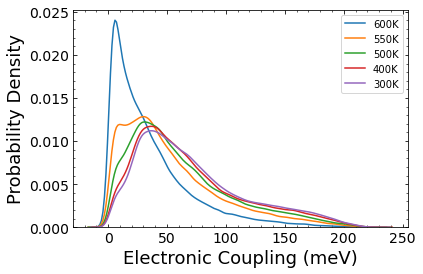

In [21]:
#Plotting the data
import seaborn as sns

sns.kdeplot(pred600*1000, bw_method='scott',bw_adjust=0.8,label="600K")
sns.kdeplot(pred550*1000, bw_method='scott',bw_adjust=0.8,label="550K")
sns.kdeplot(pred500*1000, bw_method='scott',bw_adjust=0.8,label="500K")
sns.kdeplot(pred400*1000, bw_method='scott',bw_adjust=0.8,label="400K")
sns.kdeplot(pred300*1000, bw_method='scott',bw_adjust=0.8,label="300K")
plt.xlabel('Electronic Coupling (meV)',fontsize=18)
plt.ylabel('Probability Density',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.tick_params(direction='in',which='both',right='true',top='true')
plt.minorticks_on()
plt.savefig('svr_anneal.pdf',bbox_inches='tight')

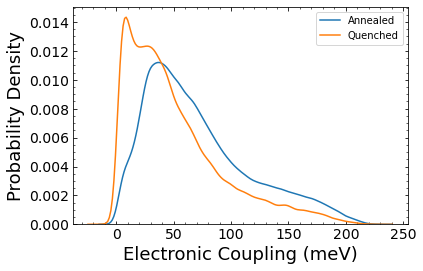

In [22]:
#Plotting the data

sns.kdeplot(pred300*1000, bw_method='scott',bw_adjust=0.8,label="Annealed")
sns.kdeplot(fpred300*1000, bw_method='scott',bw_adjust=0.8,label="Quenched")
plt.xlabel('Electronic Coupling (meV)',fontsize=18)
plt.ylabel('Probability Density',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(direction='in',which='both',right='true',top='true')
plt.minorticks_on()
plt.legend()
plt.savefig('svr_annealvsquench.pdf',bbox_inches='tight')

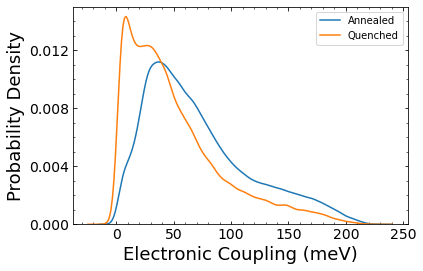

In [27]:
sns.kdeplot(pred300*1000, bw_method='scott',bw_adjust=0.8,label="Annealed")
sns.kdeplot(fpred300*1000, bw_method='scott',bw_adjust=0.8,label="Quenched")
plt.ylim((0,0.015))
plt.xlabel('Electronic Coupling (meV)',fontsize=18)
plt.ylabel('Probability Density',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(np.arange(0,0.015,0.004),fontsize=14)
plt.tick_params(direction='in',which='both',right='true',top='true')
plt.minorticks_on()
plt.legend()
plt.savefig('anneal_quench_t_density.pdf',bbox_inches='tight')

In [12]:
#Need to perform data sufficiency test as well
#six parameter data sufficiency test

nX_train6=norm_xtrain[:,[0,1,2,3,11,15]]
nX_test6=norm_xtest[:,[0,1,2,3,11,15]]

size=np.arange(0.05,0.99,0.05)
repeatsize=np.arange(1,11,1)

allrsq=[]

for i in size:
    for j in repeatsize:
        newX_train, X_testdummy, newY_train, Y_testdummy = train_test_split(nX_train6,norm_ytrain,train_size=i)
        tclf6=SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
        tclf6=tclf6.fit(newX_train,newY_train)
        Y_pred6=tclf6.predict(nX_test6)
        rmse6=np.sqrt(mean_squared_error(norm_ytest,Y_pred6))
        rsq6=r2_score(norm_ytest,Y_pred6)
        allrsq.append(rsq6)
    

In [15]:
print(allrsq)

[0.9035501992620877, 0.8988683690851286, 0.8816152145761164, 0.8827831297276196, 0.9047010940483436, 0.9051943012270939, 0.8694148382699577, 0.9072905557465576, 0.8536171369486123, 0.8921888127896028, 0.912261704494981, 0.9233071441284662, 0.9050381526497693, 0.9152590585215175, 0.9131090686556176, 0.9107259773648779, 0.922111196633001, 0.9111909723486787, 0.9106781090528527, 0.9194240443526687, 0.9286696306597039, 0.926394758330004, 0.9278960623299333, 0.9285801454726128, 0.9314810342566087, 0.9264059348729197, 0.9256172394830433, 0.9208509808715025, 0.9314604311815237, 0.9249737093627144, 0.9304183497176571, 0.9316156272772687, 0.9323080291852668, 0.9313361355578723, 0.9375188127171088, 0.9342028662272639, 0.9321764296565964, 0.9304377079224647, 0.9326552523567149, 0.9294901666507638, 0.9347902971703834, 0.9379569709331269, 0.9426791595455623, 0.9390085358714663, 0.9338781752488774, 0.9362247071446838, 0.9330710909875524, 0.9389656765798101, 0.93924592646866, 0.9354366154246883, 0.93

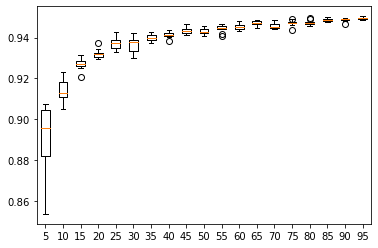

In [14]:
#Plot for data sufficiency test
plt.boxplot([allrsq[0:10],allrsq[10:20],allrsq[20:30],allrsq[30:40],allrsq[40:50],allrsq[50:60],allrsq[60:70],allrsq[70:80],allrsq[80:90],allrsq[90:100],allrsq[100:110],allrsq[110:120],allrsq[120:130],allrsq[130:140],allrsq[140:150],allrsq[150:160],allrsq[160:170],allrsq[170:180],allrsq[180:190]])
plt.xticks(np.arange(1,20,1), np.arange(5,99,5))
plt.show()